## Lab 5: Backpropagation from Scratch (NumPy)

Objective: Implement forward and backward propagation manually for a 1-hidden-layer NN



Epoch 500/5000 - Loss: 0.249826
Epoch 1000/5000 - Loss: 0.249407
Epoch 1500/5000 - Loss: 0.248448
Epoch 2000/5000 - Loss: 0.245455
Epoch 2500/5000 - Loss: 0.234269
Epoch 3000/5000 - Loss: 0.204780
Epoch 3500/5000 - Loss: 0.172087
Epoch 4000/5000 - Loss: 0.153230
Epoch 4500/5000 - Loss: 0.143812
Epoch 5000/5000 - Loss: 0.138699

Final Predictions:
Input: [0 0] - Predicted: 0 - True: 0
Input: [0 1] - Predicted: 0 - True: 1
Input: [1 0] - Predicted: 1 - True: 1
Input: [1 1] - Predicted: 1 - True: 0


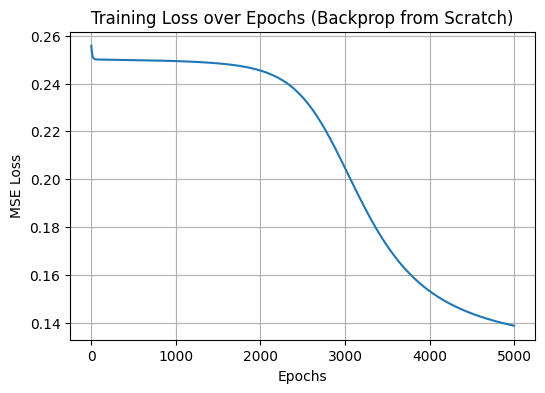

In [ ]:


import numpy as np

# 1. Create a small synthetic dataset (XOR-like)
np.random.seed(42)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])  # XOR output

# 2. Define network architecture
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1
epochs = 5000

# 3. Initialize weights & biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation functions and derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

# 4. Training loop
loss_history = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)  # prediction

    # Compute loss (MSE)
    loss = np.mean((y - a2) ** 2)
    loss_history.append(loss)

    # Backward pass
    d_a2 = -(y - a2)  # derivative of MSE w.r.t. a2
    d_z2 = d_a2 * sigmoid_derivative(a2)  # shape: (4,1)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Parameter update
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

    # Print progress occasionally
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.6f}")

# 5. Predictions after training
preds = (a2 > 0.5).astype(int)
print("\nFinal Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} - Predicted: {preds[i][0]} - True: {y[i][0]}")

# 6. Plot loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs (Backprop from Scratch)")
plt.grid(True)
plt.show()
